# Klasifikasi dengan Logistic Regression


## Penjelasan Logistic Regression

### Pengertian 
**Logistic Regression** adalah salah satu metode dalam machine learning yang digunakan untuk mengklasifikasikan data ke dalam dua kelas atau lebih. Logistic regression adalah model statistik yang menggunakan **fungsi logistik** untuk memetakan nilai prediksi ke dalam probabilitas kelas yang berada pada rentang 0 hingga 1.


### Fungsi Logistic (Sigmoid Function)

Logistic regression memanfaatkan **fungsi sigmoid** untuk memetakan nilai prediksi bebas menjadi probabilitas antara 0 dan 1. Fungsi sigmoid ini didefinisikan sebagai:

$$
\text{Sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$

Di mana:
- \( z \) adalah kombinasi linear dari fitur-fitur input
- \( e \) adalah konstanta matematika (basis logaritma natural)

Output dari fungsi sigmoid ini berupa probabilitas yang menunjukkan seberapa besar kemungkinan data termasuk ke dalam kelas 1.


### Persamaan Logistic Regression

Secara umum, persamaan logistic regression bisa ditulis sebagai:

$$
P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

- $( P(y=1|X) )$: probabilitas data $( X $) termasuk kelas 1
- $( beta_0 )$: intercept (bias)
- $( beta_1, beta_2, ..., beta_n )$: koefisien yang mewakili pengaruh fitur terhadap probabilitas
- $( X_1, X_2, ..., X_n )$: fitur-fitur input


## Implementasi Logistic Regression

### Import library

In [ ]:
import numpy as np 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import nltk

In [ ]:
nltk.download('stopwords')

### Membuat fungsi sigmoid

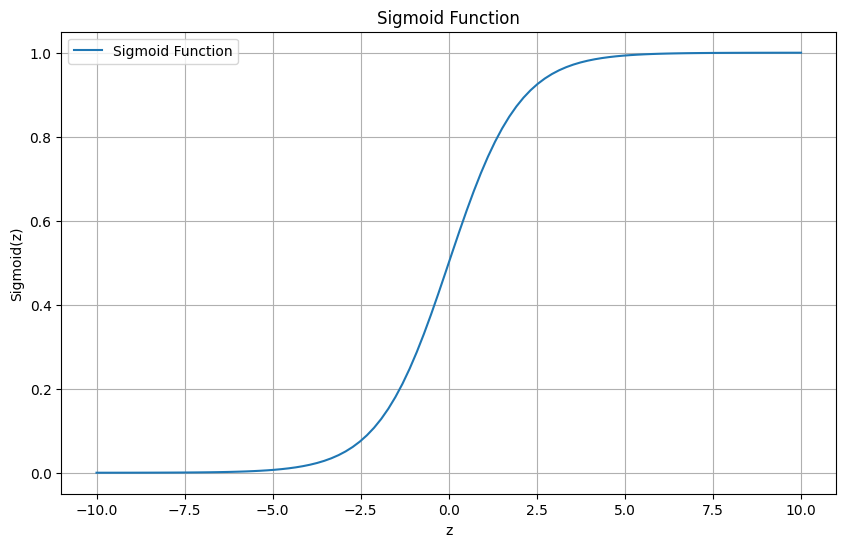

In [3]:
# Create sigmoid function and plot graph
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Generate values for z
z = np.linspace(-10, 10, 100)

# Calculate sigmoid values
sigmoid_values = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid_values, label='Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()

### Load dataset

In [4]:
# make load dataset
df = pd.read_csv('../vsm_content.csv')

df

,category,abadi,abd,abdi,abdul,abdullah,abon,aborted,abror,abudullah,...,yusuf,yusufrolandus,za,zaenal,zakaria,zaman,zeno,zero,zona,zonasi
0,Politik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,Politik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.184721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Politik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,Politik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,Politik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ekonomi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
96,Ekonomi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
97,Ekonomi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104427,0.042772
98,Ekonomi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


### Label encoding

In [5]:
label_encoder = preprocessing.LabelEncoder()

# encode label
df['category'] = label_encoder.fit_transform(df['category'])

df

,category,abadi,abd,abdi,abdul,abdullah,abon,aborted,abror,abudullah,...,yusuf,yusufrolandus,za,zaenal,zakaria,zaman,zeno,zero,zona,zonasi
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.184721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
97,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104427,0.042772
98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


### Dataset split 

In [6]:
X = df.drop(['category'], axis=1)
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_test

,abadi,abd,abdi,abdul,abdullah,abon,aborted,abror,abudullah,acara,...,yusuf,yusufrolandus,za,zaenal,zakaria,zaman,zeno,zero,zona,zonasi
26,0.0,0.0,0.0,0.000000,0.037288,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
86,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
55,0.0,0.0,0.0,0.048380,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
75,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
93,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
16,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
73,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.027503,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
54,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
95,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.064731,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


### Modelling

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [9]:
df_test = pd.DataFrame({'origin':y_test, 'prediction':y_pred})
df_test

,origin,prediction
26,1,1
86,0,0
2,1,1
55,0,0
75,0,0
93,0,0
16,1,1
73,0,0
54,0,0
95,0,0


### Model Evaluation

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



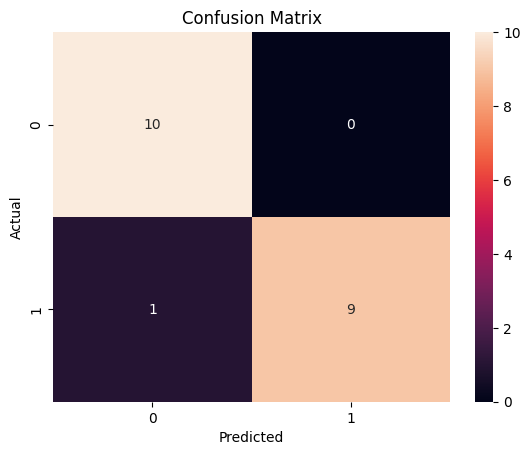

In [10]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test, y_pred))

In [11]:
import pickle

# Save the model to a file
pickle_file = "logistic_regression_model.pkl"
with open(pickle_file, 'wb') as file:
  pickle.dump(model, file)

print(f"Model saved to {pickle_file}")

Model saved to logistic_regression_model.pkl
